<a href="https://colab.research.google.com/github/ashish807/Bluetooth-Attendance-App/blob/master/Fire_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train =ImageDataGenerator(rescale = 1/255)
test =ImageDataGenerator(rescale = 1/255)

In [5]:
test_dataset = test.flow_from_directory('/content/drive/My Drive/files/test',target_size=(100,100),class_mode='binary')
train_dataset = train.flow_from_directory('/content/drive/My Drive/files/train',target_size=(100,100),batch_size=3,class_mode='binary')

Found 147 images belonging to 2 classes.
Found 1107 images belonging to 2 classes.


In [6]:
test_dataset.class_indices

{'Not_fire': 0, 'fire': 1}

In [7]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(100,100,3)),
     tf.keras.layers.MaxPool2D(2,2),

     tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(100,100,3)),
     tf.keras.layers.MaxPool2D(2,2),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

In [8]:
model.compile(loss='binary_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_dataset, steps_per_epoch=3,epochs=1500,validation_data=test_dataset)

Epoch 1/1500
3/3 [==============================] - 67s 22s/step - loss: 0.6792 - accuracy: 0.6667 - val_loss: 0.6514 - val_accuracy: 0.6327
Epoch 2/1500
3/3 [==============================] - 4s 1s/step - loss: 3.1165 - accuracy: 0.3333 - val_loss: 0.7937 - val_accuracy: 0.6531
Epoch 3/1500
3/3 [==============================] - 4s 1s/step - loss: 1.4118 - accuracy: 0.6667 - val_loss: 2.7782 - val_accuracy: 0.4422
Epoch 4/1500
3/3 [==============================] - 3s 1s/step - loss: 1.5052 - accuracy: 0.6667 - val_loss: 2.0410 - val_accuracy: 0.4422
Epoch 5/1500
3/3 [==============================] - 3s 934ms/step - loss: 1.9439 - accuracy: 0.4444 - val_loss: 0.7587 - val_accuracy: 0.5442
Epoch 6/1500
3/3 [==============================] - 2s 796ms/step - loss: 0.6886 - accuracy: 0.6667 - val_loss: 0.5742 - val_accuracy: 0.8231
Epoch 7/1500
3/3 [==============================] - 5s 2s/step - loss: 0.5359 - accuracy: 0.8889 - val_loss: 0.6125 - val_accuracy: 0.7279
Epoch 8/1500
3/3 [=

In [20]:
!pip install audioplayer
!pip install secure-smtplib

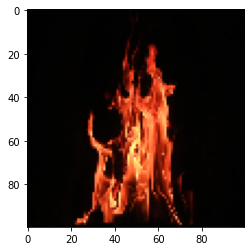

(534, b'5.7.14 <https://accounts.google.com/signin/continue?sarp=1&scc=1&plt=AKgnsbu\n5.7.14 5JEBox5Ey5DNaS4eJaN2KWdmftIxt_bpZIZaYtI6nPzwZuy4KbWpXS2fw0tto-hvdkzYA\n5.7.14 CBeUfckzyP6rKIs1kRYUKDhadIvT5K1rCO1RkFLIDksp_O3UnpUjhavoKPFh3Bkz>\n5.7.14 Please log in via your web browser and then try again.\n5.7.14  Learn more at\n5.7.14  https://support.google.com/mail/answer/78754 oh22sm1315652ejb.47 - gsmtp')
Fire


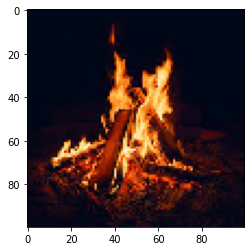

Fire


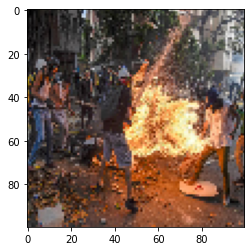

Not fire


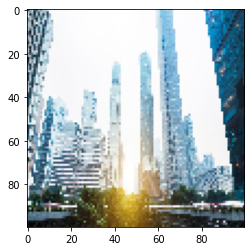

Not fire


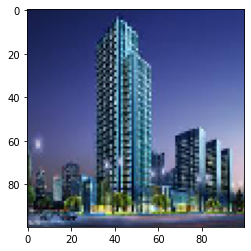

Not fire


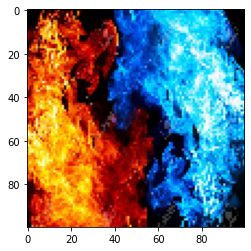

Not fire


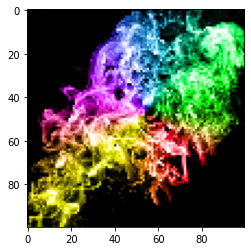

Not fire


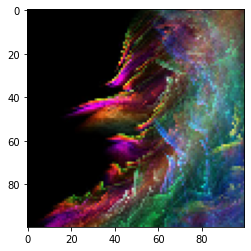

Not fire


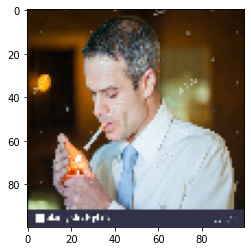

Not fire


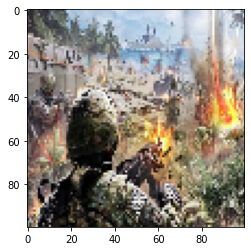

Not fire


In [25]:


import smtplib
email_status =False
dir_path = '/content/drive/My Drive/files/valid'
def play_alarm_sound_function():
		AudioPlayer("/content/drive/My Drive/files/Alarm-Fast-A1-www.fesliyanstudios.com.mp3").play(block=True)
def send_email():
  recipientEmail = "Enter_Recipient_Email"
  recipientEmail = recipientEmail.lower()
  try:
      server = smtplib.SMTP('smtp.gmail.com', 587)
      server.ehlo()
      server.starttls()
      server.login("ashish.adhikari727@gmail.com", 'icanbenumber1')
      server.sendmail('ashish.adhikari727@gmail.com', recipientEmail, "Warning A Fire Accident has been reported on ABC Company")
      print("sent to {}".format(recipientEmail))
      server.close()
  except Exception as e:
    print(e)

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(100,100))
  plt.imshow(img)
  plt.show()
  #X= img/255.0

  X =image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images =np.vstack([X])
  val =model.predict(images)

  if val==0:
    print("Not fire")
  else:
   # play_alarm_sound_function()
    if email_status==False:
      send_email()
      email_status =True
    print("Fire")

In [26]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


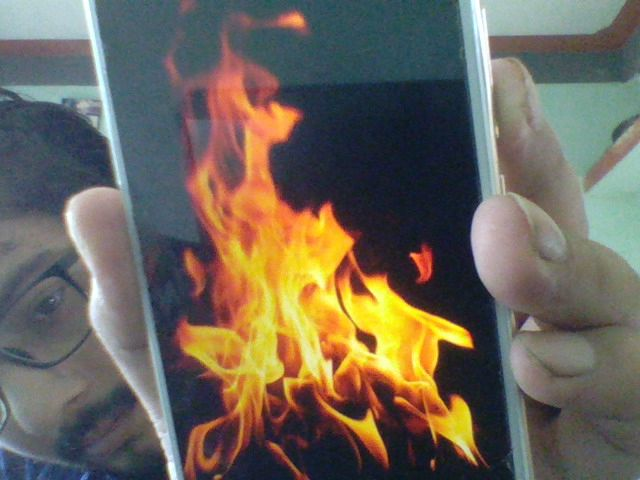

Fire


In [31]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))




img =cv2.imread('photo.jpg')
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img =cv2.resize(img,(100,100))
input =image.img_to_array(img)
input=np.expand_dims(input,axis=0)
images =np.vstack([input])
val =model.predict(images)

if val==0:
  print("Not fire")
else:
  print("Fire")